In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sympy import init_printing 
from sympy import Matrix
init_printing(use_latex=True)
def out(mat, n=2): return Matrix(np.round(mat, decimals=n))
from IPython.core.display import HTML
HTML('<link href="https://fonts.googleapis.com/css?family=Cabin|Quicksand" rel="stylesheet"><style>.container{width:90% !important; font-family: "Cabin", sans-serif;}em{color: red !important;}</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

# Eigendecomposition of a matrix

- *factorization*: decomposition of a matrix into a product of other matrices which when multiplied together give the original
- *eigendecomposition*: factorization of a matrix into a canonical form that uses its eigenvalues and eigenvectors
- given $A$, a square $N×N$ matrix with N linearly independent eigenvectors $q_i \,\, (i = 1, \dots, N)$ 
  - then $A$ can be factorized as $A = Q \Lambda Q^{-1}$
  - where $Q$ is the square $N×N$ matrix whose ith column is the eigenvector $q_{i}$ of $A$
  - and $\Lambda$ is the diagonal matrix whose diagonal elements are the corresponding eigenvalues $\Lambda _{ii}=\lambda _{i}$

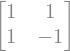

In [2]:
u = [1,1]
v = [1,-1]
A = np.mat(np.array([u,v])).T
out(A)

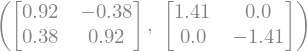

In [7]:
L,Q = np.linalg.eig(A)
Q = np.mat(Q)
Lambda = np.mat(np.diag(L))
out(Q), out(Lambda)

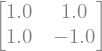

In [8]:
out(Q * Lambda * Q.I)

# Note on the eigenvectors

- the eigenvectors $q_i \,\, (i = 1, \dots, N)$ are usually normalized
  - but they need not be
- a non-normalized set of eigenvectors $v_i \,\, (i = 1, \dots, N)$ can also be used as the columns of $Q$
  - note in fact that the magnitude of the eigenvectors in $Q$ gets canceled in the decomposition by the presence of $Q^{−1}$
  - so only the eigenvalues determine the size of the effect, not the length of the eigenvectors 

# Are the eigenvectors always orthogonal?

- consider a basis $V = {v_1, ..., v_n}$ of independent but non orthogonal vectors
- build a matrix $M = V D V^{-1}$ for some diagonal matrix $D$
- $M$ is diagonalizable but its eigenvectors are not orthogonal

# Special matrices

- **Symmetric matrix**: $A=A^T$
- **Orthogonal matrix**: $Q^T=Q^{-1}$
  - columns and rows are orthogonal unit vectors
  - as a linear transformation, it represents a rotation
- **Positive definite matrix**: $z^T M z > 0$ for any vector $z$
  - admits square root: exists $B$ such that $B^2=M$


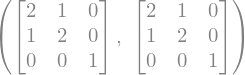

In [10]:
# symmetric matrix
A = np.mat([[2, 1, 0],[1, 2, 0], [0, 0, 1]])
out(A), out(A.T)

1.0 1.0


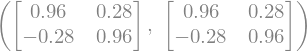

In [16]:
# orthogonal matrix
u, v = [0.96, 0.28], [-0.28, 0.96]
print(np.linalg.norm(u), np.linalg.norm(v)) # unit vectors
A = np.mat([u,v]).T # rotation matrix
out(A.T), out(A.I)

# Decomposition of symmetric matrices

- if $A$ is a symmetric matrix
  - then the eigenvalues are real 
  - and the eigenvectors are orthogonal to each other
  $$ A = Q \Lambda Q^T$$
  - where $Q$ is an orthogonal matrix

# Singular Value Decomposition (SVD)

- SVD is a factorization of a matrix
- it generalizes the eigendecomposition of a square matrix to any *rectangular* $m\times n$ matrix
- **Note:** while in the eigendecomposition the change of basis does not need to be a rotation (i.e. the eigenvectors do not need to be orthogonal)
  - the SVD is **always** described in terms of two *rotations*

# SVD

- the singular-value decomposition of an $m\times n$ matrix $\mathbf {M}$
<br>is a factorization of the form ${\displaystyle \mathbf {U\Sigma V^{T}} }$, where
  - $\mathbf {U}$  is an $m\times m$ *orthogonal* matrix
  - $\mathbf{\Sigma}$ is a $m\times n$ rectangular diagonal matrix with *non-negative* numbers on the diagonal
  - and $\mathbf {V}$  is an $n\times n$ *orthogonal* matrix
- the diagonal entries $\sigma _{i}$ of $\mathbf{\Sigma}$ are the *singular values* of $\mathbf {M}$
- the columns of $\mathbf {U}$  are called the *left-singular vectors*  of $\mathbf {M}$
- the columns of $\mathbf {V}$ are called the *right-singular vectors* of $\mathbf {M}$


<sub>
<sub>
$\mathbf{M} = \begin{bmatrix}
                      1 & 0 & 0 & 0 & 2 \\
                      0 & 0 & 3 & 0 & 0 \\
                      0 & 0 & 0 & 0 & 0 \\
                      0 & 2 & 0 & 0 & 0
                    \end{bmatrix}
$

$\mathbf{U} = \begin{bmatrix}
                  0 & 1 & 0 & 0 \\
                  1 & 0 & 0 & 0 \\
                  0 & 0 & 0 & -1 \\
                  0 & 0 & 1 & 0
                \end{bmatrix}
$

$\boldsymbol{\Sigma} = \begin{bmatrix}
                           3 &        0 &        0 &             0  & 0 \\
                           0 & \sqrt{5} &        0 &             0  & 0 \\
                           0 &        0 &        2 &             0  & 0 \\
                           0 &        0 &        0 &             0  & 0
                         \end{bmatrix}
$

$\mathbf{V}^{T} = \begin{bmatrix}
                   0           & 0  & 1 & 0 & 0 \\
                   \sqrt{0.2}  & 0  & 0 & 0 & \sqrt{0.8} \\
                   0           & 1  & 0 & 0 & 0 \\
                   0           & 0  & 0 & 1 & 0 \\
                   -\sqrt{0.8} & 0  & 0 & 0 & \sqrt{0.2}
                 \end{bmatrix}
$
</sub>
</sub>


# SVD computation

the singular-value decomposition can be computed in terms of eigendecomposition using the following observations:
- consider the SVD of $M=U \Sigma V^T$
- the matrix $M^T M$ is square and symmetric and can be written
$${\displaystyle {\begin{aligned} M^T M & = V \Sigma^T U^T U \Sigma V^T \text{(U orthogonal)}\\
&= V (\Sigma^T \Sigma) V^T \end{aligned}}}$$
- and analogously for $M M^T$
$$M M^T= U (\Sigma \Sigma^T) U^T$$

# SVD computation

hence:
- as $MM^T$ and $M^TM$ are square and symmetric we can compute their eigendecomposition
- the right-singular vectors of $M$ are the set of orthonormal eigenvectors of the symmetric matrix $M^TM$ 
- the left-singular vectors of $M$ are the set of orthonormal eigenvectors of the symmetric matrix $MM^T$
- the non-zero singular values of $M$ (i.e. the diagonal entries of $Σ$) 
<br>are the *square roots* of the non-zero eigenvalues of either $M^TM$ or $MM^T$

# In NumPy

`U, sigma, Vt = numpy.linalg.svd(M)`

Compute the singular value decomposition

- $M$ is the input rectangular matrix
- $U$ is an array containing the left-singular vectors of $M$ as columns
- $Vt$ is an array containing the right-singular vectors of $M$ as rows
- $sigma$ is a one dimensional array containing the singular values in descending order


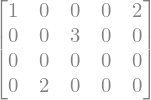

In [3]:
M = np.mat(np.array([[1,0,0,0,2],[0,0,3,0,0],[0,0,0,0,0],[0,2,0,0,0]]))
out(M)

In [19]:
U, sigma, Vt = np.linalg.svd(M)

U.shape, sigma.shape, Vt.shape


[3.         2.23606798 2.         0.        ]


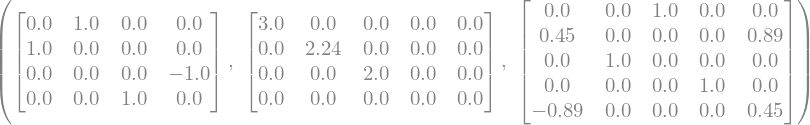

In [27]:
print(sigma)

smat = np.zeros((4, 5))
smat[:4, :4] = np.diag(sigma)

out(U), out(smat), out(Vt)

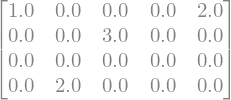

In [28]:
out(U * smat * Vt)

# Geometric interpretation

- if $M$ is an $m × m$ real square positive definite matrix
- then $U$, $V^T$, and $\Sigma$ are real $m × m$ matrices
  - $\Sigma$ is a *scaling* matrix
  - $U, V^T$ are *rotation* matrices
- the factorization $UΣV^T$ is the composition of 3 geometrical transformations: 
  1. a rotation
  2. a scaling
  3. and another rotation 

# Geometric interpretation

- upper left: the unit disc with the two canonical unit vectors
- upper right: unit disc transformed with $M$ and singular values $σ_1$ and $σ_2$ indicated
- lower left: action of $V^T$ on the unit disc: a rotation
- lower right: action of $ΣV^T$ on the unit disc: vertical and horizontal scaling

<center><img src="img/svd.png" alt="vec" width="500"/></center>

# Reduced SVDs

<center><img src="img/SVD-1.jpg" alt="vec" width="500"/></center>

What happens when m = 1,000,000 and n = 2?

# Thin SVD 

$$\mathbf {M} =\mathbf {U} _{n}{\boldsymbol {\Sigma }}_{n}\mathbf {V} ^{T}$$

- if $n < m$
- only the $n$ column vectors of $U$ corresponding to the row vectors of $V^T$ are calculated
- this is more efficient when $n ≪ m$
- the matrix $U_n$ is thus $m×n$, $Σ_n$ is $n×n$ diagonal, and $V$ is $n×n$

# Compact SVD

$$\mathbf {M} =\mathbf {U} _{r}{\boldsymbol {\Sigma }}_{r}\mathbf {V} _{r}^{T}$$

- if $M$ as rank $r$ and $r<m$ and $r<n$
- only the $r$ column vectors of $U$ and $r$ row vectors of $V^T$ are calculated
  - corresponding to the non-zero singular values $Σ_r$ 
- this is more efficient when $r ≪ n$
- the matrix $U_r$ is thus $m×r$, $Σ_r$ is $r×r$ diagonal, and $V_r^T$ is $r×n$



# Truncated SVD

$${\bar {\mathbf {M} }}=\mathbf {U} _{t}{\boldsymbol {\Sigma }}_{t}\mathbf {V} _{t}^{T}$$

- if one decides for a $t<r$
- only the $t$ column vectors of $U$ and $t$ row vectors of $V^T$ are calculated
  - corresponding to the $t$ *largest* singular values $Σ_t$ 
- this is more efficient when $t≪r$
- the matrix $U_t$ is thus $m×t$, $Σ_t$ is $t×t$ diagonal, and $V_t^T$ is $t×n$
- the truncated SVD is *no* longer an exact decomposition of the original matrix $M$ but can be used to reconstruct an *approximate* matrix

# Notes on the action of SVD

- $V$ contains the principal directions (as column vectors)
- $MV$ will project the data matrix on the principal directions, i.e. represents the coordinate vectors in the basis of $V$
- as: $MV =(U \Sigma V^T ) V = U \Sigma I = U \Sigma $
<br> hence $U \Sigma$ represents the coordinate vectors in the basis of $V$

# Truncated SVD

- consider a $m \times n$ pixels image as a data matrix with values representing the gray intesity
- i.e. a column vector is a thin (1 pixel) stripe 

<center><img src="img/f1.png" alt="ex" width="300"/></center>

- we can then represent an image using a smaller number of singular vectors

# Truncated SVD

- using only 1, 2 or 3 singular vectors

<center><img src="img/f2.png" alt="ex" width="800"/></center>

# Truncated SVD

- using more singular vectors

<center><img src="img/f3.png" alt="ex" width="800"/></center>

# SVD uses in Data Science/Machine Learning

- to compute PCA

- dimensionality reduction

- dataset compression

- features extractions

- noise reduction

- sparse representation to dense representation

- orthogonalisation

- typically used as part of data analysis pipeline

- ...
